In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_rate(csv_path):
    df = pd.read_csv(csv_path)
    a = np.array(df.iloc[:, 0])
    print(csv_path)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.hist(a,bins=50,range=[0,0.3])
    ax.set_xlabel("pixels_rate")
    plt.show()
    
def show_img(img_path):
    img=cv2.imread(img_path)
    plt.imshow(img)
    

def cal_pix(img_path):
    gray=cv2.imread(img_path)[:,:,0]
    height, width = gray.shape
    num_pixels = np.count_nonzero(gray) / float(height * width)
    return num_pixels

bent
bubble
cylinder
diamond
disc
ex
eyefish
fisheye
hand_kerchief
heart
hyperbolic


ValueError: num must be 1 <= num <= 10, not 11

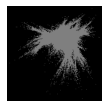

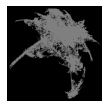

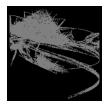

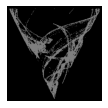

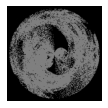

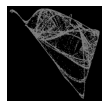

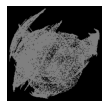

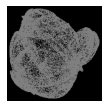

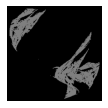

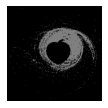

<Figure size 1440x1440 with 0 Axes>

In [3]:
#各バリエーションの画像
#for cat in os.scandir("./sample/image"):
    #plt.figure(figsize=(20,20))
    #print(cat.name)
    #for i,img in enumerate(os.scandir(cat.path),start=1):
        #plt.subplot(1,5,i)
        #show_img(img.path)
        #plt.axis('off')
    #plt.show()
for a,cat in enumerate(os.scandir("./sample/image"),start=1):
    plt.figure(figsize=(20,20))
    print(cat.name)
    for i,img in enumerate(os.scandir(cat.path),start=1):
        plt.subplot(1,10,a)
    show_img(img.path)
    plt.axis('off')
plt.show()

# ガウスぼかしの適用  
ガウスぼかしを適用した画像が以下の通り

[  0   1   3   8   9  13  15  16  17  18  21  25  26  27  28  29  30  31
  35  36  37  40  42  43  44  45  46  47  49  50  51  52  53  54  56  59
  60  62  64  66  67  69  75  77  78  79  80  81  82  83  85  88  89  91
  92  93  95  96  97  98  99 127]
[  0   1   2   4   5   6   8   9  10  11  12  13  15  16  17  18  19  20
  21  22  23  25  27  29  30  31  32  33  34  35  36  37  38  39  40  42
  43  44  46  47  48  50  51  54  55  56  58  59  61  62  65  74  75  77
  78  79  80  81  82  84  85  86  88  89  90  92  93  94  95  96  97  98
 100 101 102 103 104 105 106 108 109 110 111 112 113 114 116 118 119 120
 121 122 123 124 125 126 127]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86

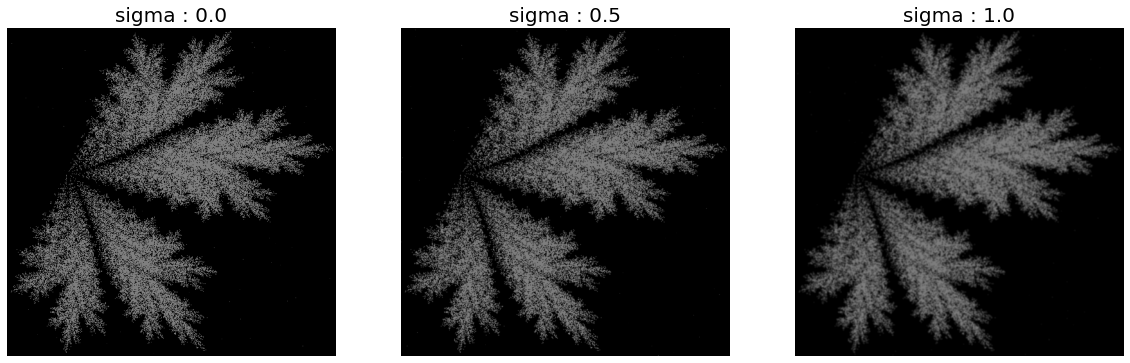

In [ ]:
from scipy.ndimage import gaussian_filter

img_path="./sample/image/linear/00067.png"
plt.figure(figsize=(20,20))
for i,sigma in enumerate([0.0,0.5,1.0],start=1):
    plt.subplot(1,3,i)
    plt.title('sigma : '+str(sigma),fontsize=20)
    img=cv2.imread(img_path)
    for i in range(100):
        x,y=np.random.randint(0,len(img),2)
        img[x][y]=np.random.randint(100)
    img=gaussian_filter(img,sigma,truncate=4)
    print(np.unique(img))
    plt.imshow(img)
    plt.axis('off')
plt.show()

# 平滑化フィルターの適用

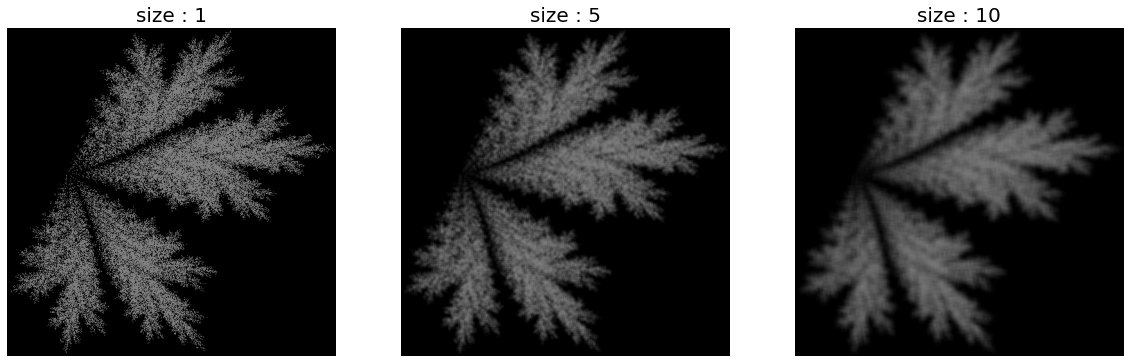

In [ ]:
from scipy.ndimage import uniform_filter

img_path="./sample/image/linear/00067.png"
plt.figure(figsize=(20,20))
for i,size in enumerate([1,5,10],start=1):
    plt.subplot(1,3,i)
    plt.title('size : '+str(size),fontsize=20)
    img=cv2.imread(img_path)
    img=uniform_filter(img,size)
    plt.imshow(img)
    plt.axis('off')
plt.show()

# メディアンフィルタの適用

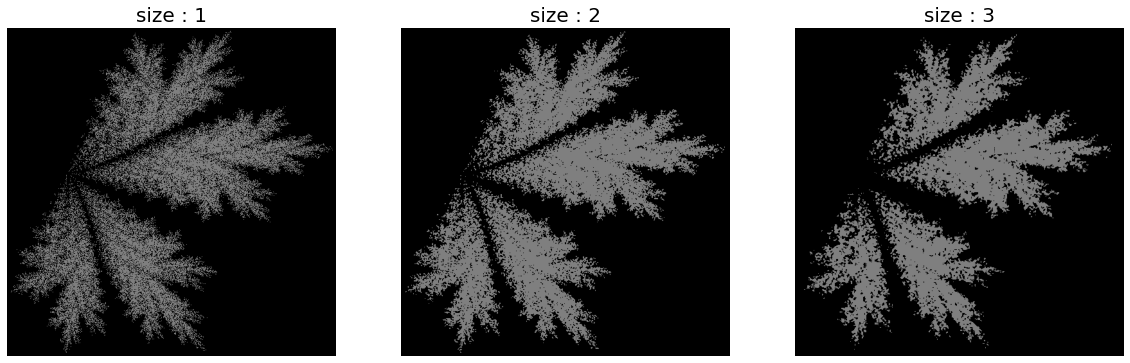

In [ ]:
from scipy.ndimage import median_filter

img_path="./sample/image/linear/00067.png"
plt.figure(figsize=(20,20))
for i,size in enumerate([1,2,3],start=1):
    plt.subplot(1,3,i)
    plt.title('size : '+str(size),fontsize=20)
    img=cv2.imread(img_path)
    img=median_filter(img,size=size)
    plt.imshow(img)
    plt.axis('off')
plt.show()

# filling_rateについて     
    
       
- filling_rate=プロットされた点の数/全体のpixel数 
- FractalDBでは0.2以上の画像を採用するよう設定されていた。  
- linearモデルでは0.3以上となる画像はほとんど生成できないらしい。   
- filling_rateが低いと無駄なスペースが出来てしまい、学習が効率的に行われない可能性がある

disc
filling_rate : 0.15507888793945312


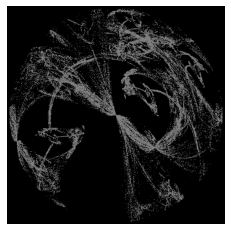

hand_kerchief
filling_rate : 0.13068389892578125


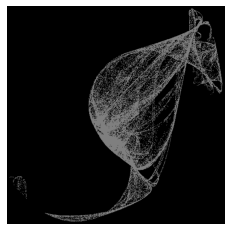

heart
filling_rate : 0.18944168090820312


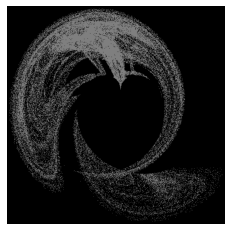

hyperbolic
filling_rate : 0.0561981201171875


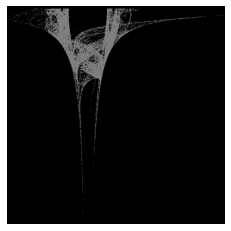

linear
filling_rate : 0.219451904296875


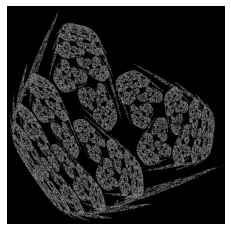

polar
filling_rate : 0.14252853393554688


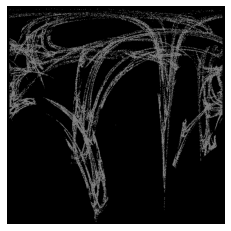

sinusoidal
filling_rate : 0.2163543701171875


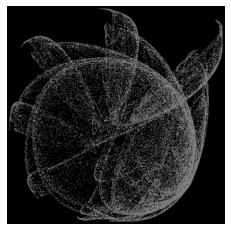

spherical
filling_rate : 0.05850982666015625


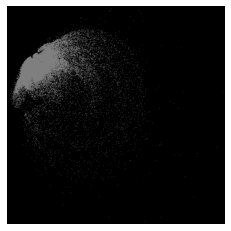

spiral
filling_rate : 0.1044769287109375


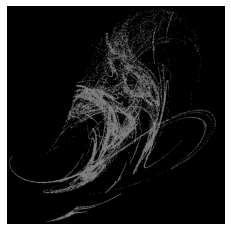

swirl
filling_rate : 0.08332061767578125


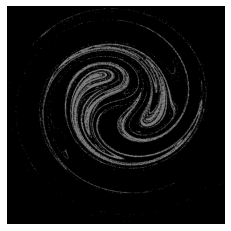

In [ ]:
for cat in os.scandir("./sample/image"):
    print(cat.name)
    for i,img in enumerate(os.scandir(cat.path),start=1):
        print("filling_rate : "+str(cal_pix(img.path)))
        show_img(img.path)
        plt.axis('off')
        plt.show()
        break

# 各バリエーションでのfilling_rateの取りうる値  
- 1000回画像生成を行い、各バリエーションでのfilling_rateの分布を調べる
- 学習に使えそうな画像候補のfilling_rateは0.05より上
- 画像サイズは512*512(サイズによってfilling_rateは変わる可能性がある)

中央値 : 0.08407592773437501
disc.csv


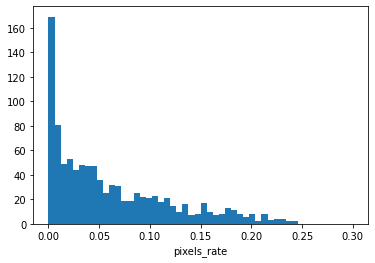

中央値 : 0.043079376220703125
hand_kerchief.csv


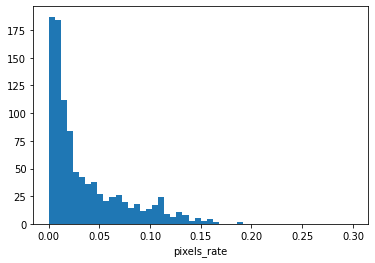

中央値 : 0.054767608642578125
heart.csv


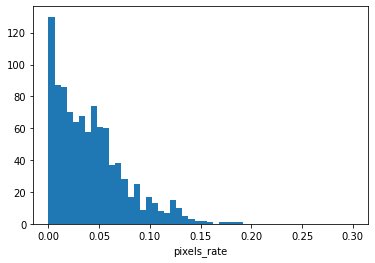

中央値 : 0.008697509765625
hyperbolic.csv


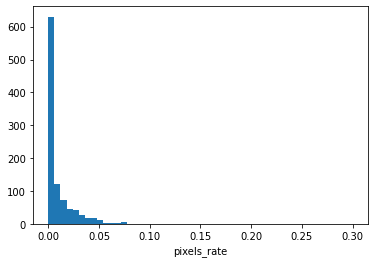

中央値 : 0.07452392578125
linear.csv


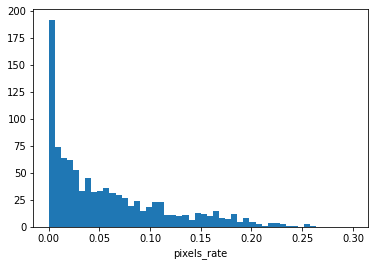

中央値 : 0.13581085205078125
polar.csv


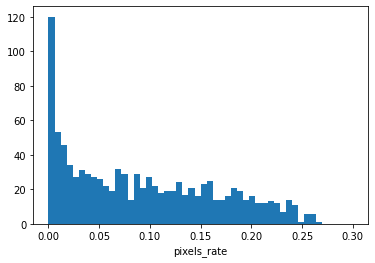

中央値 : 0.16899490356445312
sinusoidal.csv


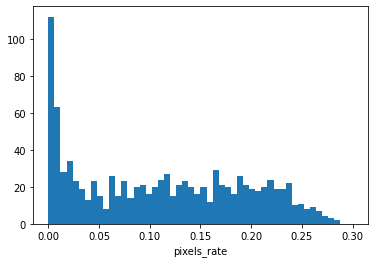

中央値 : 0.006641387939453125
spherical.csv


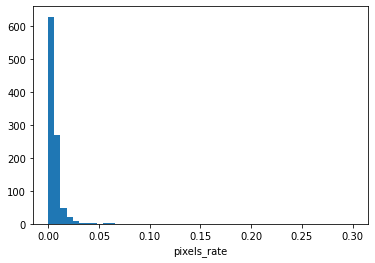

中央値 : 0.01540374755859375
spiral.csv


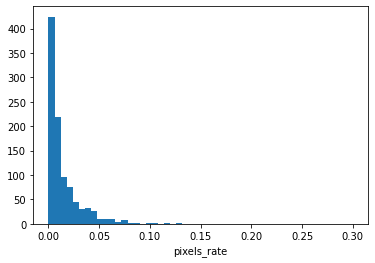

中央値 : 0.06396102905273438
swirl.csv


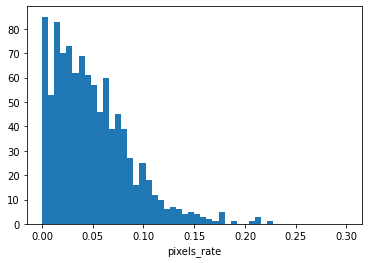

In [ ]:
for file in os.scandir("./pixels_csv"):
    df = pd.read_csv(file)
    a = np.array(df.iloc[:, 0])
    print("中央値 : "+str(sorted(a)[700]))
    print(file.name)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.hist(a,bins=50,range=[0,0.3])
    ax.set_xlabel("pixels_rate")
    plt.show()

# 画像類似度の算出
20x20の平滑フィルタで畳み込みを行い、画像間でその差分を算出する。値が小さいほど似た構造のフラクタルであるとする。  
ここでは一番似たような画像が数多く生成されていたswirlのフラクタルで検証する。  

sim=698461344.0


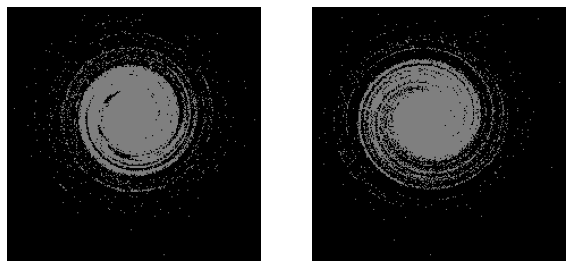

sim=934234668.0


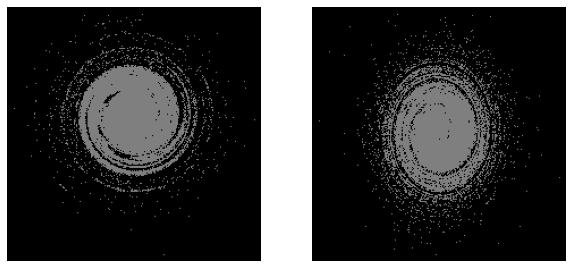

sim=1735598322.0


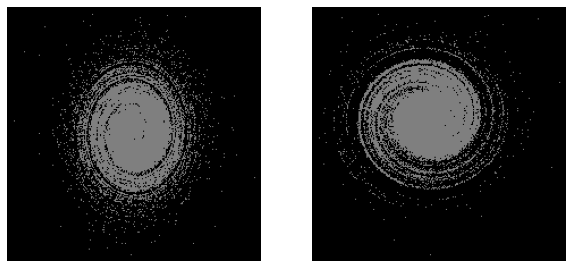

sim=1816342470.0


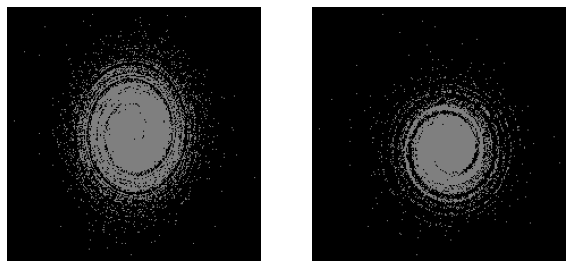

sim=3695763204.0


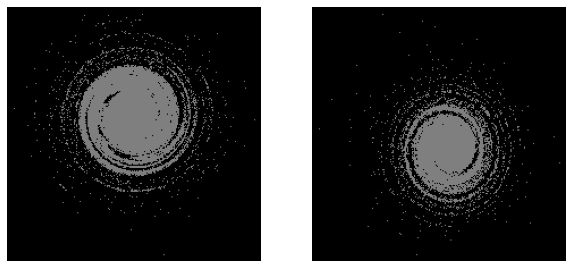

sim=4699887930.0


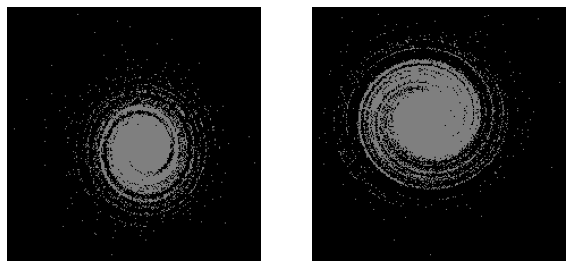

In [11]:
image_path="./sample/image/swirl"
result=[]
num=4
size=20
for i,file1 in enumerate(list(os.scandir(image_path))[:num]):
    for j,file2 in enumerate(list(os.scandir(image_path))[:num]):
        if i>=j:
            continue
        sim=0
        img1=cv2.imread(file1.path)/127
        img2=cv2.imread(file2.path)/127
        img_size=img1.shape[0]
        for x in range(img_size):
            for y in range(img_size):
                filter_slice_x=slice(max(x-int(size/2),0),min(x+int(size/2),img_size))
                filter_slice_y=slice(max(y-int(size/2),0),min(y+int(size/2),img_size))
                sim+=(np.sum(img1[filter_slice_y,filter_slice_x])-np.sum(img2[filter_slice_y,filter_slice_x]))**2
        result.append({"img1":file1.path,"img2":file2.path,"sim":sim})
result=sorted(result,key=lambda x:x['sim'])
show_num=num*num/2
for a in result[::int((num*num/2)/show_num)]:
    print("sim="+str(a["sim"]))
    img1=cv2.imread(a["img1"])
    img2=cv2.imread(a["img2"])
    plt.figure(figsize=(10,20))
    plt.subplot(1,2,1)
    plt.axis("off")
    plt.imshow(img1)
    plt.subplot(1,2,2)
    plt.axis("off")
    plt.imshow(img2)
    plt.show()

# 階層的クラスタリングを使ってフラクタル画像を分類する
rssの値をもとにクラスタリングを行う

In [4]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

image_path="./fractal_image/linear"
data=[]
num=3
size=3
plt.figure(figsize=(10,10))
image_sample_list=random.sample(list(os.scandir(image_path)),num*num)
for i,file1 in enumerate(image_sample_list,start=1):
    img1=median_filter(cv2.imread(file1.path),size=size)
    d=[]
    plt.subplot(num,num,i)
    plt.title(str(i-1),fontsize=20)
    plt.imshow(img1)
    plt.axis("off")
    for file2 in image_sample_list:
        img2=median_filter(cv2.imread(file2.path),size=size)
        rss=np.sum((img1-img2)**2)
        d.append(rss)
    data.append(d)
plt.show()
df=pd.DataFrame(data)
method="ward"
Z = linkage(df, method=method, metric="euclidean")
dendrogram(Z)
plt.title(method)
plt.show()

FileNotFoundError: [WinError 3] 指定されたパスが見つかりません。: './fractal_image/linear'

<Figure size 720x720 with 0 Axes>

In [10]:
from tqdm import tqdm
result=[]
size=20
num=20
for a in tqdm(os.scandir("./sample/image")):
    image_path=a.path
    sim_sum=0
    for i,file1 in enumerate(list(os.scandir(image_path))[:num]):
        for j,file2 in enumerate(list(os.scandir(image_path))[:num]):
            if i>=j:
                continue
            img1=cv2.imread(file1.path)/127
            img2=cv2.imread(file2.path)/127
            img_size=img1.shape[0]
            for x in range(img_size):
                for y in range(img_size):
                    filter_slice_x=slice(max(x-int(size/2),0),min(x+int(size/2),img_size))
                    filter_slice_y=slice(max(y-int(size/2),0),min(y+int(size/2),img_size))
                    sim_sum+=(np.sum(img1[filter_slice_y,filter_slice_x])-np.sum(img2[filter_slice_y,filter_slice_x]))**2
    result.append({"name":a.name,"sim":sim_sum})
result=sorted(result,key=lambda x:x['sim'])
for i in result:
    print(i["sim"],i["name"])

19it [37:56, 119.81s/it]

516484648314.0 spiral
664717154364.0 swirl
785184600582.0 julia
788590419489.0 heart
802858722804.0 hyperbolic
858082599711.0 diamond
990663460002.0 power
1106279320482.0 ex
1212281277813.0 linear
1251557266383.0 spherical
1292994295524.0 bent
1379308365378.0 disc
1437289215642.0 hand_kerchief
1634808918636.0 bubble
1708204611249.0 polar
1849812516918.0 eyefish
1917823425930.0 fisheye
2080259376372.0 sinusoidal
2423824973073.0 cylinder
